### Introduction
Linear Regression, a foundational algorithm in data science, plays a pivotal role in predicting continuous outcomes. This guide provides an in-depth exploration of Linear Regression, covering its principles, applications, and implementation in Python on a real-world dataset. From understanding simple and multiple linear regression to unveiling its significance, limitations, and practical use cases, this article serves as a comprehensive resource for both beginners and practitioners. Join us on this journey through the intricacies of linear regression, offering insights into its workings and hands-on application. 
[visit for more](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
dataset = pd.read_csv('height-weight.csv')
dataset.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

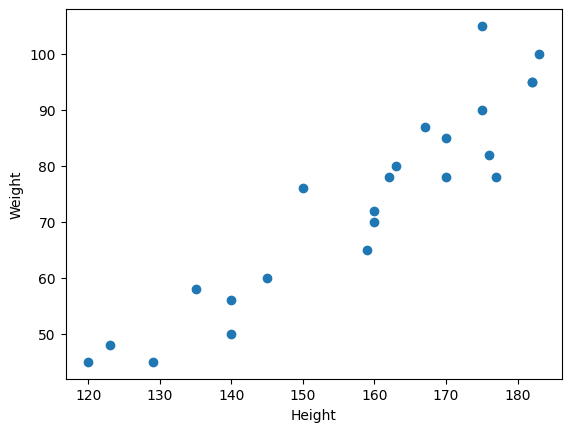

In [26]:
plt.scatter(dataset['Height'], dataset['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [27]:
### divide out dataset into independent and dependent variables
X = dataset[['Weight']]
y  = dataset['Height']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [30]:
X.shape

(23, 1)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [32]:
### standardize the data Train independent data
from sklearn.preprocessing import StandardScaler

In [33]:
scalar = StandardScaler()

In [34]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


<Axes: >

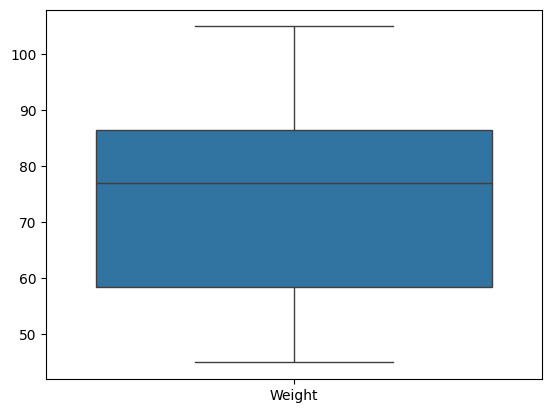

In [35]:
import seaborn as sns
sns.boxplot(X_train)

In [36]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

<Axes: >

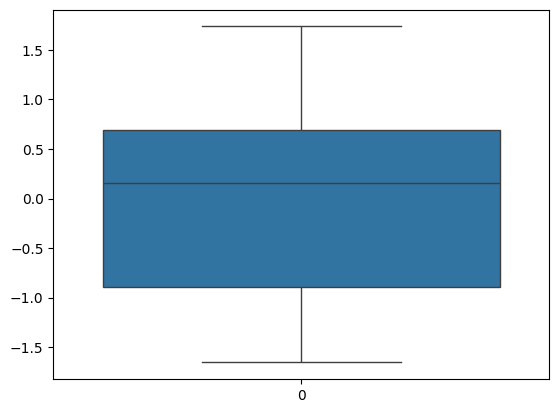

In [37]:
sns.boxplot(X_train)

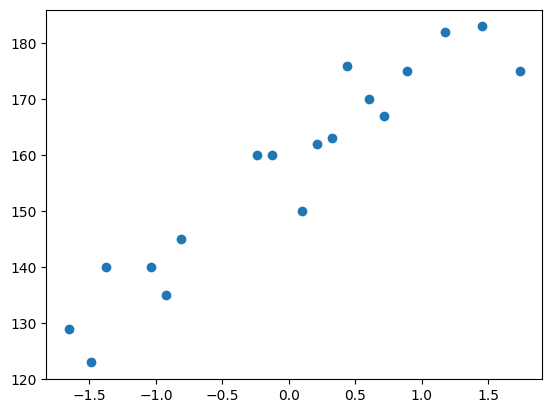

In [38]:
plt.scatter(X_train,y_train)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression()

In [41]:
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
print('The slope of the line is:', regression.coef_)
print('The y-intercept is:', regression.intercept_)

The slope of the line is: [17.03440872]
The y-intercept is: 157.5


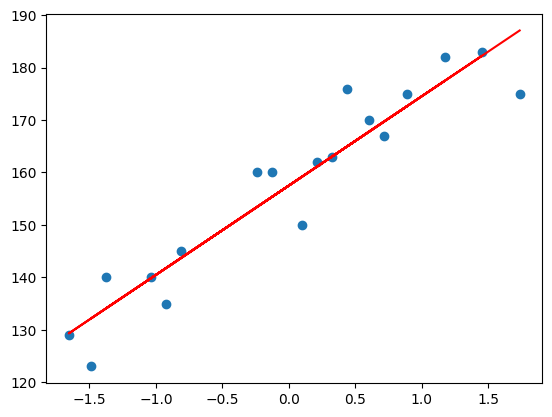

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train), color='red')

### Predication of Train Data 
1. predication height output  = intercept + coef_(Weights)
2. y_pred_train = 157 + 17.03 (X_train)

### Predication of Test Data
1. predication height output  = intercept + coef_(Weights)
2. y_pred_test = 157 + 17.03 (X_test)

In [44]:
y_pred_test = regression.predict(X_test)

In [52]:
X_test.size

5

In [50]:
(y_test).size

5

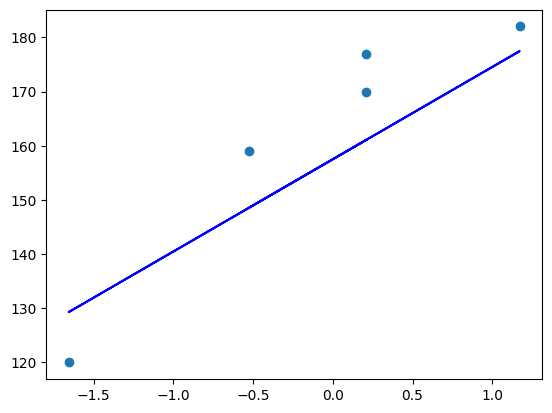

In [54]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'blue')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [55]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [56]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081


## R square and adjusted R square

Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [57]:
from sklearn.metrics import  r2_score
score = r2_score(y_test,y_pred_test)

In [58]:
score

0.776986986042344

In [59]:
# display the adjusted R-squared value
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [62]:
### new Data point weight is 80
scaled_weight = scalar.transform([[80]])
scaled_weight

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [64]:
print("The height prediction for weight 80 kg is :",regression.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


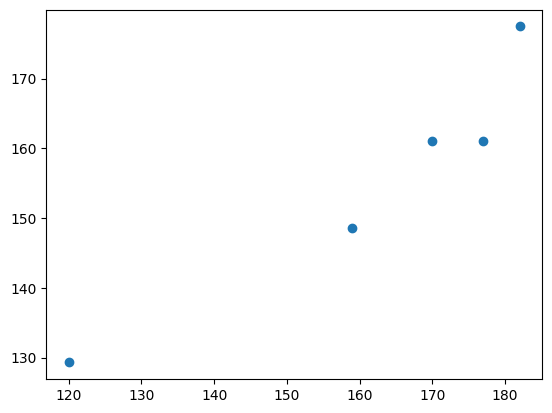

In [65]:
## Assumption 
### plot a scatter plot for predication 
plt.scatter(y_test,y_pred_test)

In [66]:
## Residual 
residual = y_test - y_pred_test
residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

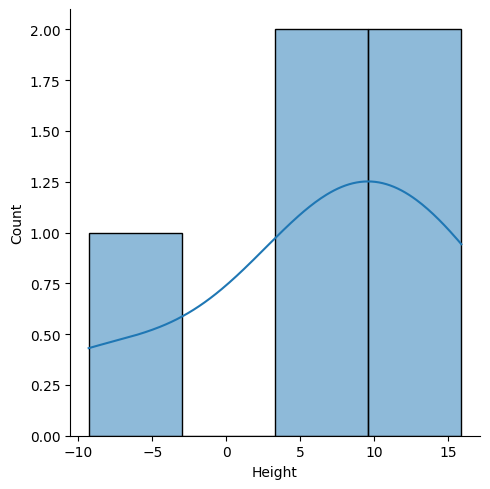

In [70]:
import seaborn as sns
sns.displot(residual, kde=True)
